## Leetcode 2096. Step-By-Step Directions From a Binary Tree Node to Another


    https://leetcode.com/problems/step-by-step-directions-from-a-binary-tree-node-to-another/?envType=daily-question&envId=2024-07-16

**Description**

    You are given the root of a binary tree with n nodes. Each node is uniquely assigned a value from 1 to n. You are also given an integer startValue representing the value of the start node s, and a different integer destValue representing the value of the destination node t.

    Find the shortest path starting from node s and ending at node t. Generate step-by-step directions of such path as a string consisting of only the uppercase letters 'L', 'R', and 'U'. Each letter indicates a specific direction:

    'L' means to go from a node to its left child node.
    'R' means to go from a node to its right child node.
    'U' means to go from a node to its parent node.
    Return the step-by-step directions of the shortest path from node s to node t.

 

    Example 1:

    Input: root = [5,1,2,3,null,6,4], startValue = 3, destValue = 6
    Output: "UURL"
    Explanation: The shortest path is: 3 → 1 → 5 → 2 → 6.
    
    Example 2:

    Input: root = [2,1], startValue = 2, destValue = 1
    Output: "L"
    Explanation: The shortest path is: 2 → 1.
    

**Constraints**

    The number of nodes in the tree is n.
    2 <= n <= 105
    1 <= Node.val <= n
    All the values in the tree are unique.
    1 <= startValue, destValue <= n
    startValue != destValue


In [4]:

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


In [17]:
from typing import List, Optional

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def insertLevelOrder(arr: List[Optional[int]], root: Optional[TreeNode], i: int, n: int) -> Optional[TreeNode]:
    if i < n:
        if arr[i] is not None:
            temp = TreeNode(val=arr[i])
            root = temp

            root.left = insertLevelOrder(arr, root.left, 2 * i + 1, n)
            root.right = insertLevelOrder(arr, root.right, 2 * i + 2, n)
        else:
            root = None
    return root

def buildTree(arr: List[Optional[int]]) -> Optional[TreeNode]:
    n = len(arr)
    if n == 0:
        return None
    return insertLevelOrder(arr, None, 0, n)


In [5]:
from typing import Optional

In [25]:
class Solution:
    def getDirections(self, root: Optional[TreeNode], startValue: int, destValue: int) -> str:
        
        def findLCA(root, start, destination):
            if not root:
                return None
            
            if root.val == start or root.val == destination:
                return root
            
            left = findLCA(root.left, start, destination)
            right = findLCA(root.right, start, destination)
            
            if left and right:
                return root
            
            return left if left else right
        
        
        def findPath(root, val, path):
            if not root:
                return False
            if root.val == val:
                return True
            
            path.append('L')
            if findPath(root.left, val, path):
                return True
            
            path.pop()
            path.append('R')
            
            if findPath(root.right, val, path):
                return True
            
            path.pop()
            return False
            
            
        lca = findLCA(root, startValue, destValue)
        upPath = []
        movePath = []
        findPath(lca, startValue, upPath)
        findPath(lca, destValue, movePath)
        
        return 'U' * len(upPath) + ''.join(movePath)
            

In [26]:
sol = Solution()

In [27]:

arr = [5, 1, 2, 3, None, 6, 4]
root = buildTree(arr)
print(sol.getDirections(root, startValue=3, destValue=6))

UURL


In [28]:

arr = [2,1]
root = buildTree(arr)
print(sol.getDirections(root, startValue=2, destValue=1))

L


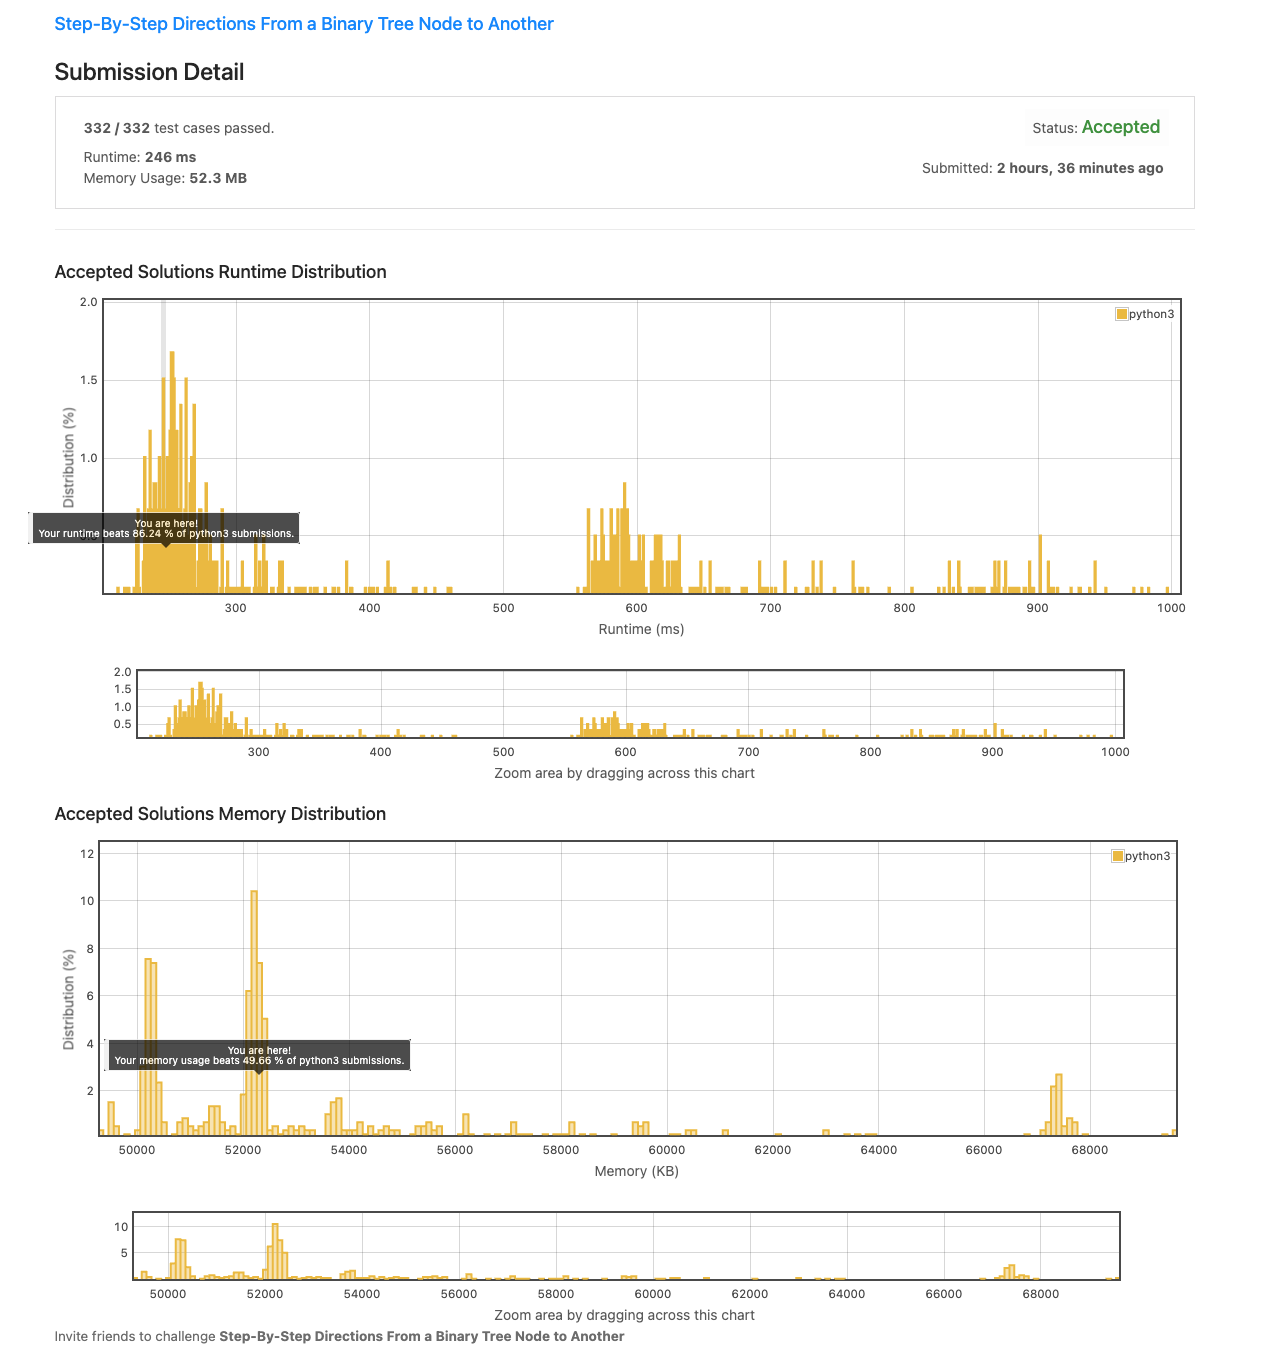

Z